Using Python for the study of Exoplanet Transits.

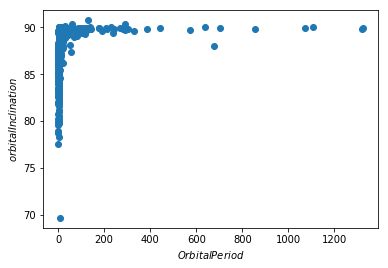

In [2]:
import matplotlib.pyplot as plt
from astropy.io import ascii
import numpy as np

data = ascii.read("c:\\users\mwood\TransitData\ConfirmedPlanets.csv")

plt.scatter(data["pl_orbper"],data['pl_orbincl'])
plt.xlabel("$Orbital Period$",fontsize=10)
plt.ylabel("$orbital Inclination$",fontsize=10)
plt.show()

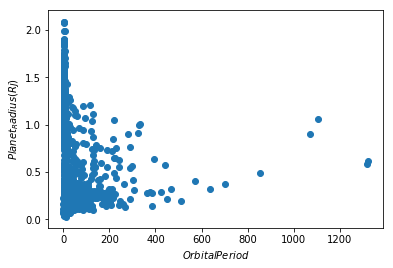

In [12]:
plt.scatter(data['pl_orbper'],data['pl_radj'])
plt.xlabel("$Orbital Period$",fontsize=10)
plt.ylabel("$Planet_Radius(Rj)$",fontsize=10)
plt.show()

This is a markdown cell.

In [ ]:
import batman

In [2]:
params = batman.TransitParams()
params.t0 = 0.                       #time of inferior conjunction
params.per = 1.                      #orbital period
params.rp = 0.1                      #planet radius (in units of stellar radii)
params.a = 15.                       #semi-major axis (in units of stellar radii)
params.inc = 87.                     #orbital inclination (in degrees)
params.ecc = 0.                      #eccentricity
params.w = 90.                       #longitude of periastron (in degrees)
params.u = [0.1, 0.3]                #limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"       #limb darkening model

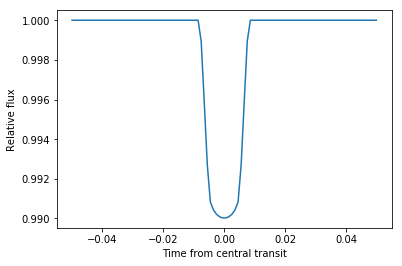

In [6]:
t = np.linspace(-0.05,0.05,100)

m = batman.TransitModel(params, t)    #initializes model

flux = m.light_curve(params)          #calculates light curve

radii = np.linspace(0.09,0.11,20)
for r in radii:
    params.np = r
    new_flux = m.light_curve(params)

plt.plot(t,flux)
plt.xlabel("Time from central transit")
plt.ylabel("Relative flux")
plt.show()